In [12]:
# import library
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt 
from PIL import Image
import glob

In [15]:
data_dir = 'D:\\jupy\\211024 deep_learning revision/cat_vs_dog'


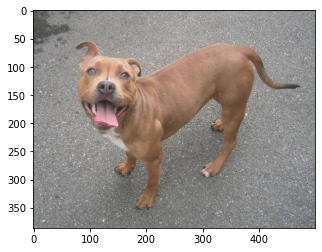

In [17]:
#load image 
img = Image.open('dog.14.jpg')
plt.imshow(img)

In [20]:
# 이미지 사이즈 확인
img.size

(500, 386)

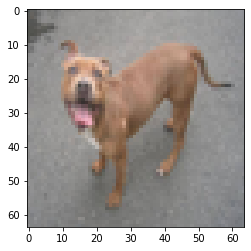

In [21]:
# 이미지 resize 모습 
plt.imshow(img.resize([64,64]))

In [23]:
# 이미지에 대한 색상 변경 
data = img.convert("RGB")

In [24]:
# 이미지 resize 
data = data.resize([64,64])

In [25]:
data = np.asarray(data)

In [26]:
# 이미지 형태 바꾸기 
data.reshape([1,64,64,3])

array([[[[ 82,  87,  88],
         [ 99, 100,  98],
         [ 97,  98,  97],
         ...,
         [146, 147, 151],
         [147, 148, 153],
         [144, 145, 150]],

        [[ 90,  92,  90],
         [101,  99,  95],
         [ 94,  94,  93],
         ...,
         [144, 145, 148],
         [147, 148, 153],
         [143, 144, 149]],

        [[ 90,  90,  86],
         [ 99,  96,  91],
         [103, 103, 101],
         ...,
         [146, 147, 150],
         [145, 146, 150],
         [142, 143, 147]],

        ...,

        [[133, 135, 136],
         [130, 131, 133],
         [145, 146, 148],
         ...,
         [122, 124, 129],
         [115, 118, 123],
         [121, 125, 130]],

        [[129, 130, 132],
         [131, 132, 134],
         [136, 137, 139],
         ...,
         [115, 117, 122],
         [119, 122, 127],
         [121, 124, 131]],

        [[138, 138, 140],
         [130, 132, 133],
         [130, 131, 133],
         ...,
         [119, 122, 127],
        

In [27]:
data.shape

(64, 64, 3)

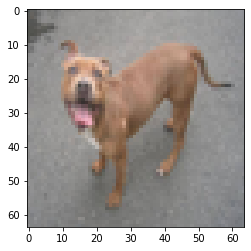

In [28]:
plt.imshow(data)

## CNN으로 강아지 고양이 분류하기

In [35]:
# 경로지정 
data_dir = data_dir+'/training_set/training_set/'

In [31]:
# 카테고리 지정 
categories = ['cats','dogs']
nb_class = len(categories)

In [32]:
# 이미지 사이즈 지정 
image_w = 64
image_h = 64
pixels = image_w * image_h * 3

In [38]:
# 이미지마다 원 핫 인코딩 
x = []
y = []

# 폴더 안에 있는 데이터 다 가져오기 
# enumerate(): 리스트의 순서와 값 반환

for idx, category in enumerate(categories):
    label = [0 for i in range(nb_class)]
    label[idx] = 1
    image_dir = data_dir+'/'+category
    files = glob.glob(image_dir+"/*.jpg")
#     print(files)
    # 파일안에 있는 이미지 오픈해서 어레이값으로 변경
    for i, file in enumerate(files):
        img = Image.open(file)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)
        x.append(data)
        y.append(label)

In [42]:
len(x)

8005

In [43]:
len(y)

8005

In [50]:
# 실제 array형태로 바꾸기 / 형태 확인 
x = np.array(x)
y = np.array(y)

In [53]:
x.shape, y.shape

((8005, 64, 64, 3), (8005, 2))

In [56]:
y.shape

(8005, 2)

In [57]:
y[0]

array([1, 0])

In [58]:
x[0]

array([[[ 38,  43,  42],
        [ 44,  47,  53],
        [ 44,  47,  49],
        ...,
        [ 76,  84, 108],
        [129, 131, 129],
        [200, 196, 167]],

       [[ 37,  41,  40],
        [ 38,  41,  47],
        [ 45,  48,  50],
        ...,
        [ 79,  87, 112],
        [125, 126, 129],
        [201, 194, 169]],

       [[ 37,  41,  40],
        [ 35,  38,  44],
        [ 48,  51,  53],
        ...,
        [ 81,  92, 111],
        [127, 130, 127],
        [207, 196, 168]],

       ...,

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 23,  23,  23],
        ...,
        [ 70,  58,  54],
        [ 77,  61,  61],
        [ 75,  60,  54]],

       [[ 21,  19,  20],
        [ 21,  20,  20],
        [ 22,  21,  22],
        ...,
        [ 55,  38,  36],
        [ 69,  53,  50],
        [ 68,  54,  49]],

       [[ 25,  23,  24],
        [ 22,  20,  21],
        [ 24,  22,  23],
        ...,
        [ 80,  62,  58],
        [ 66,  49,  44],
        [ 44,  31,  24]]

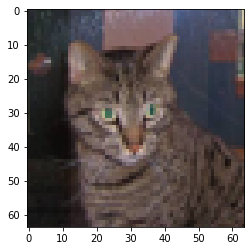

In [59]:
plt.imshow(x[0])

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
# train/ test 데이터 셋 나누기 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [67]:
x_train.shape, y_train.shape

((6404, 64, 64, 3), (6404, 2))

In [68]:
x_test.shape, y_test.shape

((1601, 64, 64, 3), (1601, 2))

In [69]:
# array 값 데이터셋 저장 
image_data = (x_train, x_test, y_train, y_test)
np.save('./cat_vs_dog_image_data.npy',image_data)

C:\Users\yng12\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [70]:
# 저장한 array 값 불러와서 사용 
# allow_pickle = True 꼭 사용 
x_train, x_test, y_train, y_test = np.load('./cat_vs_dog_image_data.npy',allow_pickle=True)

In [71]:
x_train.shape, y_train.shape

((6404, 64, 64, 3), (6404, 2))

In [72]:
# 표준화 또는 정규화 사용 
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255